# Differential analysis

This notebook shows how to create a differential analysis based on two CombObj's (A and B) from two different cell types.

In [1]:
import tfcomb.objects

## Prepare GM12878 and K562 CombObjs

The two objects contain ENCODE ChIP-seq peaks (1bp centered on the middle of the peak) from the celltypes GM12878 and K562 respectively.

In [2]:
A = tfcomb.objects.CombObj(verbosity=0)
A.prefix = "GM12878"
A.TFBS_from_bed("../data/GM12878_hg38_chr4_TF_chipseq.bed")
A.market_basket()
A.set_verbosity(1) #reset verbosity to INFO

In [3]:
B = tfcomb.objects.CombObj(verbosity=0)
B.prefix = "K562"
B.TFBS_from_bed("../data/K562_hg38_chr4_TF_chipseq.bed")
B.market_basket()

## Compare two CombObj's

The two objects contain different amounts of TFs and rules:

In [4]:
print(A)
print(B)

<CombObj: 112109 TFBS (151 unique names) | Market basket analysis: 21284 rules>
<CombObj: 216370 TFBS (447 unique names) | Market basket analysis: 166088 rules>


We will now use the _.compare_-function of CombObj 'A' to directly compare it with CombObj 'B'. What you will see is that many of the TFs are different between the object and are thus removed:

In [5]:
compare_obj = A.compare(B)

INFO: Calculating foldchange for contrast: GM12878 / K562
INFO: The calculated log2fc's are found in the rules table (<DiffCombObj>.rules)


The results of the differential analysis are now found in the .rules of the CombObj:

In [6]:
compare_obj.rules

,TF1,TF2,GM12878_cosine,K562_cosine,GM12878/K562_cosine_log2fc,GM12878/K562_cosine_log2fc_pvalue,GM12878/K562_cosine_log2fc_pvalue_adj
SIX5-SUZ12,SIX5,SUZ12,0.005640,0.478929,-3.296597,9.886413e-19,1.197640e-14
SUZ12-SIX5,SUZ12,SIX5,0.005640,0.478929,-3.296597,9.886413e-19,1.197640e-14
HDAC2-RCOR1,HDAC2,RCOR1,0.021535,0.451746,-2.845654,4.056481e-07,4.914021e-03
RCOR1-HDAC2,RCOR1,HDAC2,0.021535,0.451746,-2.845654,4.056481e-07,4.914021e-03
HDAC2-TCF12,HDAC2,TCF12,0.029991,0.459674,-2.702758,1.272258e-02,1.000000e+00
...,...,...,...,...,...,...,...
TAF1-POLR2AphosphoS2,TAF1,POLR2AphosphoS2,0.309317,0.011989,2.574740,4.973549e-03,1.000000e+00
MTA2-BMI1,MTA2,BMI1,0.340207,0.015346,2.615788,6.071481e-04,1.000000e+00
BMI1-MTA2,BMI1,MTA2,0.340207,0.015346,2.615788,6.071481e-04,1.000000e+00
LARP7-BACH1,LARP7,BACH1,0.322762,0.010475,2.664918,6.127388e-03,1.000000e+00


## Plot differential co-occurring TFs

We can now have a look at the changes between the two objects in terms of 'cosine' measure:

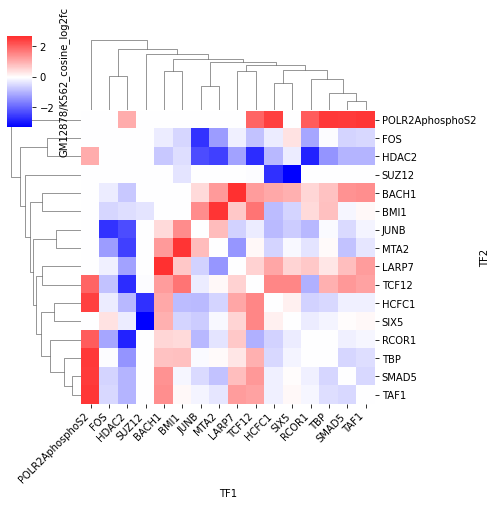

In [7]:
compare_obj.plot_heatmap()

Like in the case for CombObjs, we can also select a subset of interesting differentially co-occurring TFs:

INFO: Selecting rules for contrast: ('GM12878', 'K562')
INFO: measure_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of rules using thresholds


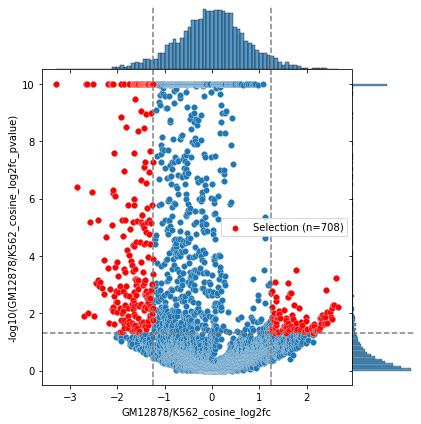

In [8]:
selection = compare_obj.select_rules()

We can also plot the network to show the pairs which are either increasing or decreasing in 'cosine' measure between the two cell types:

INFO: Finished! The network is found within <CombObj>.network.


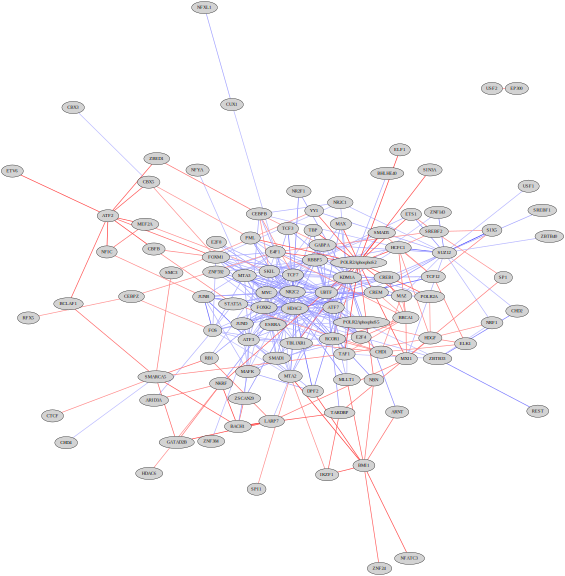

In [9]:
selection.plot_network()

The strictness of the threshold can be adjusted with `measure_threshold_percent`:

INFO: Selecting rules for contrast: ('GM12878', 'K562')
INFO: measure_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of rules using thresholds


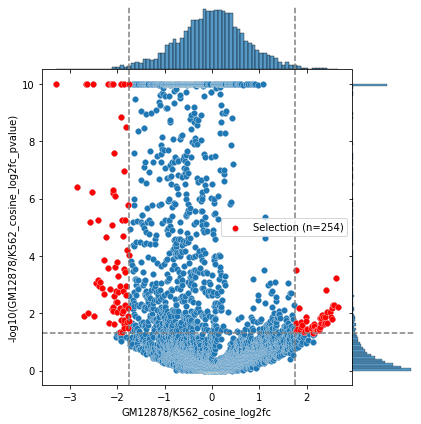

In [10]:
selection2 = compare_obj.select_rules(measure_threshold_percent=0.01)

INFO: Finished! The network is found within <CombObj>.network.


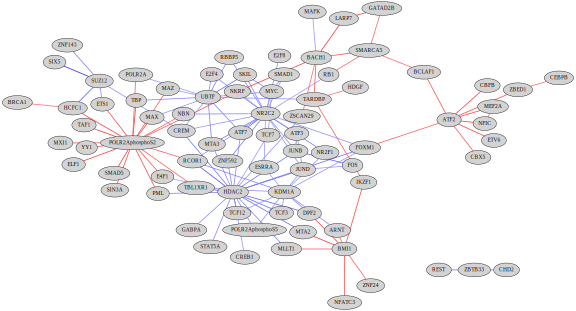

In [11]:
selection2.plot_network()